In [25]:
# Load the airline csv to explore the data
import pandas as pd

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

airlines = pd.read_csv('data/airlines.csv')

In [26]:
# Load the validation csv to explore the data
validation = pd.read_csv('data/validation.csv')
validation

,time,load_year,load_month,organization_code_icao,organization_code_iata,passenger_load_factor_pct
0,2022-01-01,2022,1,AKT,5T,58.690042
1,2022-02-01,2022,2,AKT,5T,63.308469
2,2022-03-01,2022,3,AKT,5T,64.637411
3,2022-04-01,2022,4,AKT,5T,66.932459
4,2022-05-01,2022,5,AKT,5T,67.446506
5,2022-06-01,2022,6,AKT,5T,70.693034
6,2022-07-01,2022,7,AKT,5T,73.201766
7,2022-08-01,2022,8,AKT,5T,72.395967
8,2022-09-01,2022,9,AKT,5T,70.449091
9,2022-10-01,2022,10,AKT,5T,69.669281


In [27]:
# Join validation and airlines on iata code, not equal attribute names
validation = validation.merge(airlines, left_on='organization_code_iata', right_on='airline_code_iata')
# Sort on passenger_load_factor_pct
validation.sort_values('passenger_load_factor_pct', ascending=True)


,time,load_year,load_month,organization_code_icao,organization_code_iata,passenger_load_factor_pct,airline_code_iata,airline_type
24,2022-01-01,2022,1,EZE,T3,34.360509,T3,Regional
34,2022-11-01,2022,11,EZE,T3,43.530411,T3,Regional
25,2022-02-01,2022,2,EZE,T3,46.023938,T3,Regional
26,2022-03-01,2022,3,EZE,T3,46.911462,T3,Regional
35,2022-12-01,2022,12,EZE,T3,47.014008,T3,Regional
27,2022-04-01,2022,4,EZE,T3,52.979749,T3,Regional
28,2022-05-01,2022,5,EZE,T3,57.353800,T3,Regional
12,2022-01-01,2022,1,DLA,EN,58.690042,EN,Regional
0,2022-01-01,2022,1,AKT,5T,58.690042,5T,Regional
29,2022-06-01,2022,6,EZE,T3,59.944001,T3,Regional


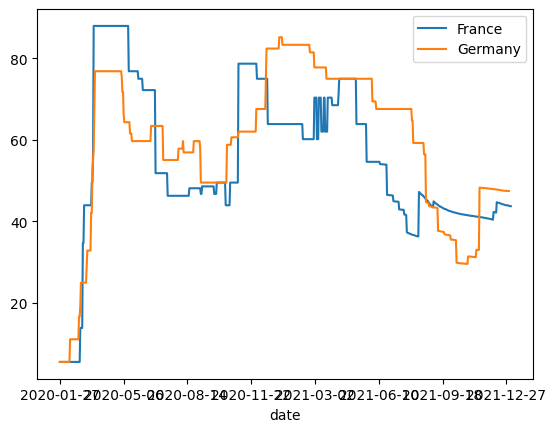

In [28]:
import matplotlib.pyplot as plt
# Import covid data
covid = pd.read_csv('data/covid.csv')

# Plot stringency_index over time for a given country
def plot_country(country):
    country_data = covid[covid['location'] == country]
    country_data.plot(x='date', y='stringency_index')
    plt.show()

# Overlayed on the same plot, plot stringency_index over time for two countries
def plot_countries(country1, country2):
    country1_data = covid[covid['location'] == country1]
    country2_data = covid[covid['location'] == country2]
    # Plot on the same axis
    ax = country1_data.plot(x='date', y='stringency_index')
    country2_data.plot(x='date', y='stringency_index', ax=ax)
    
    # Label colours with country names
    ax.lines[0].set_label(country1)
    ax.lines[1].set_label(country2)
    ax.legend()

    plt.show()

# Plot stringency_index over time for france and germany
plot_countries('France', 'Germany')

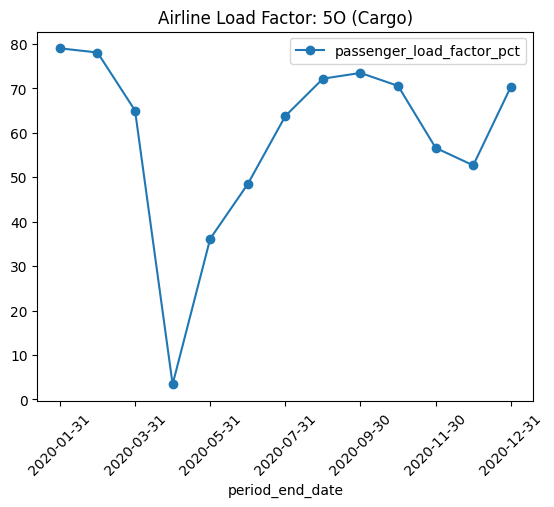

In [29]:
# Import load factor data
load_factor = pd.read_csv('data/load_factor_data.csv')

# Plot passenger_load_factor_pct over time for a given airline
def plot_airline_load_factor(airline, start, end):
    airline_data = load_factor[load_factor['organization_code_iata'] == airline]

    # Plot between start and end dates
    airline_data = airline_data[(airline_data['period_end_date'] >= start) & (airline_data['period_end_date'] <= end)]
    # Add dots at each data point
    airline_data.plot(x='period_end_date', y='passenger_load_factor_pct', style='o-')


    airline_type = airlines[airlines['airline_code_iata'] == airline]['airline_type'].values[0]
    # Plot title for the airline
    plt.title("Airline Load Factor: " + airline + " (" + airline_type + ")")
    # space out the x axis labels
    plt.xticks(rotation=45)

    plt.show()

# Plot 5O
plot_airline_load_factor('5O', '2020-01-01', '2020-12-31')

In [30]:
# Convert date from YYYY-MM-DD to (Year, Month)
def convert_date(start, end):
    start_year = int(start[0:4])
    start_month = int(start[5:7])
    end_year = int(end[0:4])
    end_month = int(end[5:7])
    return (start_year, start_month), (end_year, end_month)

/tmp/ipykernel_6702/3124608995.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test = test.groupby(['seats_year', 'seats_month']).sum()


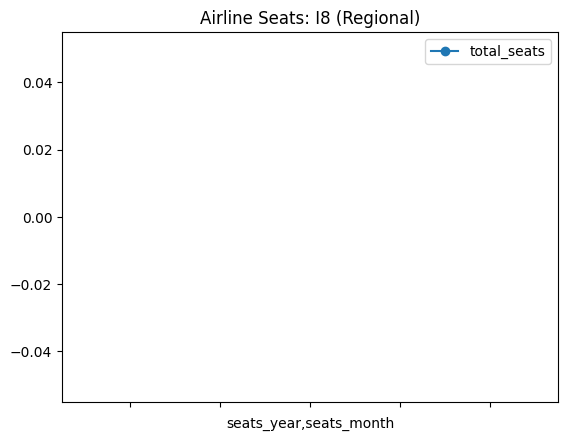

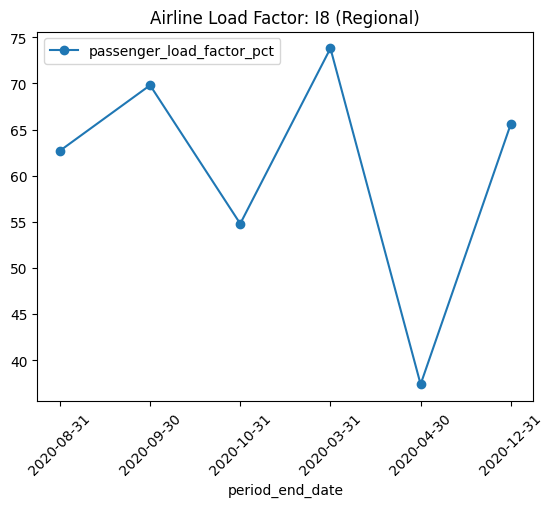

In [31]:
# Import the seats data
seats = pd.read_csv('data/seats.csv')

def plot_seats(airline, start, end):
    airline_type = airlines[airlines['airline_code_iata'] == airline]['airline_type'].values[0]

    # Convert date from YYYY-MM-DD to (Year, Month)
    start, end = convert_date(start, end)

    # Filter by operating airlines
    test = seats[seats['operating_airline'] == airline]  

    # Group by pair seats_year and seats_month
    test = test.groupby(['seats_year', 'seats_month']).sum()

    
    # Date in format (year, month)
    # Plot the number of sseats over time, add dots at each point between start and end dates
    test.loc[start:end].plot(y='total_seats', marker='o')

    #test.plot(y='total_seats', marker='o')

    # Plot title for the airline
    plt.title("Airline Seats: " + airline + " (" + airline_type + ")")
    plt.show()

airline = 'I8'


start = '2020-01-01'
end = '2020-12-31'

plot_seats(airline, start, end)
plot_airline_load_factor(airline , start, end)